In [1]:
!pip install imblearn

In [1]:
import imblearn
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import getpass
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
password = getpass.getpass()

········


In [143]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query = '''
        select distinct film_id, title, rental_duration, rental_rate, length, rating, rental_date, month(rental_date) as month
from film
join inventory using(film_id)
join rental using(inventory_id)
where year(rental_date)=2005
limit 1000
;
        '''

data = pd.read_sql_query(query, engine)
data

,film_id,title,rental_duration,rental_rate,length,rating,rental_date,month
0,1,ACADEMY DINOSAUR,6,0.99,86,PG,2005-07-08 19:03:15,7
1,1,ACADEMY DINOSAUR,6,0.99,86,PG,2005-08-02 20:13:10,8
2,1,ACADEMY DINOSAUR,6,0.99,86,PG,2005-08-21 21:27:43,8
3,1,ACADEMY DINOSAUR,6,0.99,86,PG,2005-05-30 20:21:07,5
4,1,ACADEMY DINOSAUR,6,0.99,86,PG,2005-06-17 20:24:00,6
...,...,...,...,...,...,...,...,...
995,66,BENEATH RUSH,6,0.99,53,NC-17,2005-07-07 04:04:26,7
996,66,BENEATH RUSH,6,0.99,53,NC-17,2005-08-02 04:45:01,8
997,66,BENEATH RUSH,6,0.99,53,NC-17,2005-07-08 19:02:46,7
998,66,BENEATH RUSH,6,0.99,53,NC-17,2005-07-31 17:54:58,7


In [144]:
data.shape

(1000, 8)

In [145]:
data.dtypes


film_id                     int64
title                      object
rental_duration             int64
rental_rate               float64
length                      int64
rating                     object
rental_date        datetime64[ns]
month                       int64
dtype: object

In [146]:
data.describe()

,film_id,rental_duration,rental_rate,length,rental_date,month
count,1000.00000,1000.000000,1000.000000,1000.000000,1000,1000.000000
mean,32.79200,4.880000,2.950000,111.625000,2005-07-20 14:07:16.802000128,7.064000
min,1.00000,3.000000,0.990000,46.000000,2005-05-25 01:59:46,5.000000
25%,16.75000,4.000000,0.990000,82.000000,2005-07-06 18:34:55,7.000000
50%,31.00000,5.000000,2.990000,113.000000,2005-07-28 07:24:04.500000,7.000000
75%,50.00000,6.000000,4.990000,147.000000,2005-08-17 12:04:02,8.000000
max,66.00000,7.000000,4.990000,182.000000,2005-08-23 21:34:33,8.000000
std,19.11429,1.215351,1.499549,39.376807,NaN,0.884696


In [147]:
data.isna().sum()

film_id            0
title              0
rental_duration    0
rental_rate        0
length             0
rating             0
rental_date        0
month              0
dtype: int64

In [148]:
data.duplicated().sum()

0

In [149]:

for col in data.columns:
    if 'month' in col and (data['month'] == 8).any():
        print(f"Column: {col}")
        print(data[data['month'] == 8]['title'])
        
data['rented_last_month'] = data['month'] == 8



Column: month
1      ACADEMY DINOSAUR
2      ACADEMY DINOSAUR
7      ACADEMY DINOSAUR
9      ACADEMY DINOSAUR
10     ACADEMY DINOSAUR
             ...       
990    BEHAVIOR RUNAWAY
993        BENEATH RUSH
994        BENEATH RUSH
996        BENEATH RUSH
999        BENEATH RUSH
Name: title, Length: 357, dtype: object


In [150]:
data.head(50)

,film_id,title,rental_duration,rental_rate,length,rating,rental_date,month,rented_last_month
0,1,ACADEMY DINOSAUR,6,0.99,86,PG,2005-07-08 19:03:15,7,False
1,1,ACADEMY DINOSAUR,6,0.99,86,PG,2005-08-02 20:13:10,8,True
2,1,ACADEMY DINOSAUR,6,0.99,86,PG,2005-08-21 21:27:43,8,True
3,1,ACADEMY DINOSAUR,6,0.99,86,PG,2005-05-30 20:21:07,5,False
4,1,ACADEMY DINOSAUR,6,0.99,86,PG,2005-06-17 20:24:00,6,False
5,1,ACADEMY DINOSAUR,6,0.99,86,PG,2005-07-07 10:41:31,7,False
6,1,ACADEMY DINOSAUR,6,0.99,86,PG,2005-07-30 22:02:34,7,False
7,1,ACADEMY DINOSAUR,6,0.99,86,PG,2005-08-23 01:01:01,8,True
8,1,ACADEMY DINOSAUR,6,0.99,86,PG,2005-07-31 21:36:07,7,False
9,1,ACADEMY DINOSAUR,6,0.99,86,PG,2005-08-22 23:56:37,8,True


In [151]:
data['rented_last_month'].value_counts()

rented_last_month
False    643
True     357
Name: count, dtype: int64

In [152]:
data = data.set_index('film_id')
data

,title,rental_duration,rental_rate,length,rating,rental_date,month,rented_last_month
film_id,,,,,,,,
1,ACADEMY DINOSAUR,6,0.99,86,PG,2005-07-08 19:03:15,7,False
1,ACADEMY DINOSAUR,6,0.99,86,PG,2005-08-02 20:13:10,8,True
1,ACADEMY DINOSAUR,6,0.99,86,PG,2005-08-21 21:27:43,8,True
1,ACADEMY DINOSAUR,6,0.99,86,PG,2005-05-30 20:21:07,5,False
1,ACADEMY DINOSAUR,6,0.99,86,PG,2005-06-17 20:24:00,6,False
...,...,...,...,...,...,...,...,...
66,BENEATH RUSH,6,0.99,53,NC-17,2005-07-07 04:04:26,7,False
66,BENEATH RUSH,6,0.99,53,NC-17,2005-08-02 04:45:01,8,True
66,BENEATH RUSH,6,0.99,53,NC-17,2005-07-08 19:02:46,7,False


In [153]:
data.dtypes

title                        object
rental_duration               int64
rental_rate                 float64
length                        int64
rating                       object
rental_date          datetime64[ns]
month                         int64
rented_last_month              bool
dtype: object

EDA

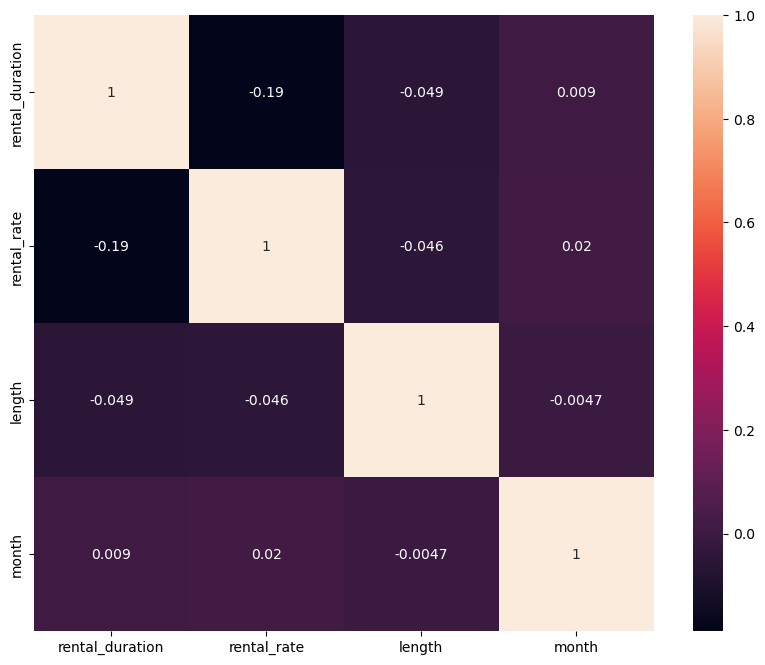

In [154]:
# Checking for multi-colinearity (features with correlation around .9, because they carry redundant information that we can remove before training the model)
corr_matrix=data.select_dtypes("number").corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

We don't have any features with around .9 - so we don't need to delete anathing for improving our analysis.

In [155]:
categorical=data.select_dtypes('object')
categorical

,title,rating
film_id,,
1,ACADEMY DINOSAUR,PG
1,ACADEMY DINOSAUR,PG
1,ACADEMY DINOSAUR,PG
1,ACADEMY DINOSAUR,PG
1,ACADEMY DINOSAUR,PG
...,...,...
66,BENEATH RUSH,NC-17
66,BENEATH RUSH,NC-17
66,BENEATH RUSH,NC-17


In [156]:
data['title'].value_counts()

title
APACHE DIVINE                  31
BARBARELLA STREETCAR           25
ALASKA PHANTOM                 25
ARACHNOPHOBIA ROLLERCOASTER    24
ALAMO VIDEOTAPE                23
                               ..
ALI FOREVER                     8
BED HIGHBALL                    6
APOCALYPSE FLAMINGOS            6
BANG KWAI                       5
ACE GOLDFINGER                  5
Name: count, Length: 61, dtype: int64

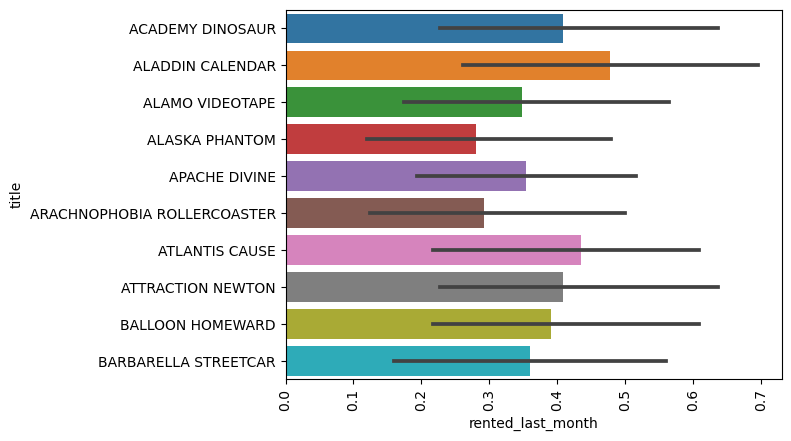

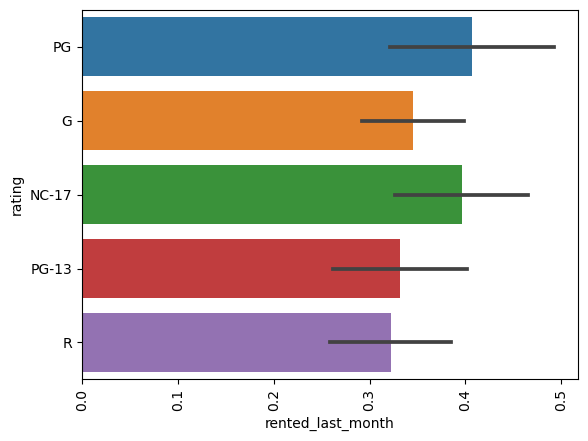

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

N = 10  # Set the number of top values to display

for col in data.select_dtypes("object"):
    top_values = data[col].value_counts().nlargest(N).index
    sns.barplot(x=data['rented_last_month'], y=data[col].where(data[col].isin(top_values)))
    plt.xticks(rotation=90)
    plt.show()


C:\Users\Tetiana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


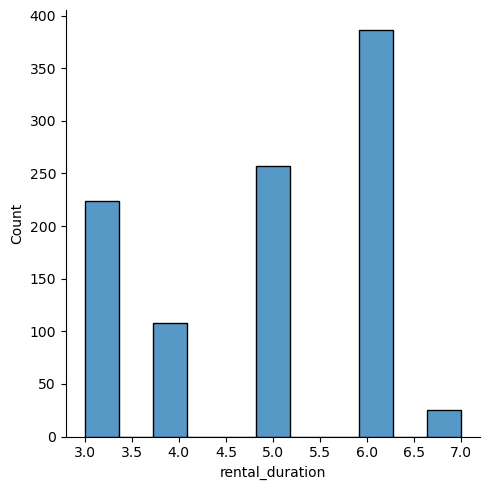

C:\Users\Tetiana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


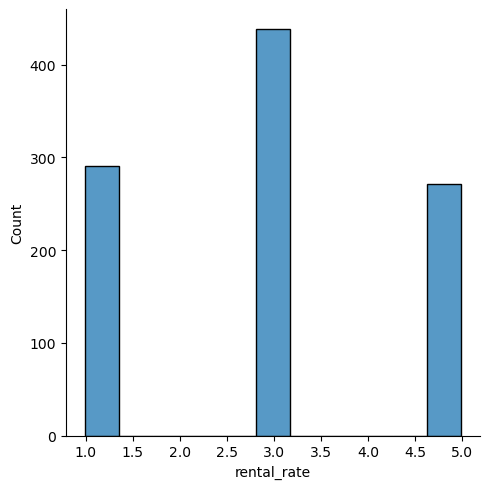

C:\Users\Tetiana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


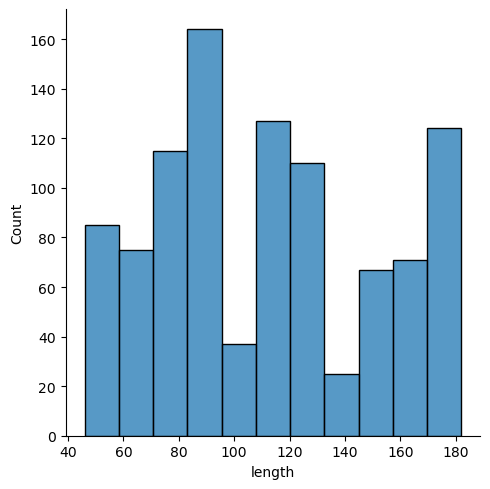

C:\Users\Tetiana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


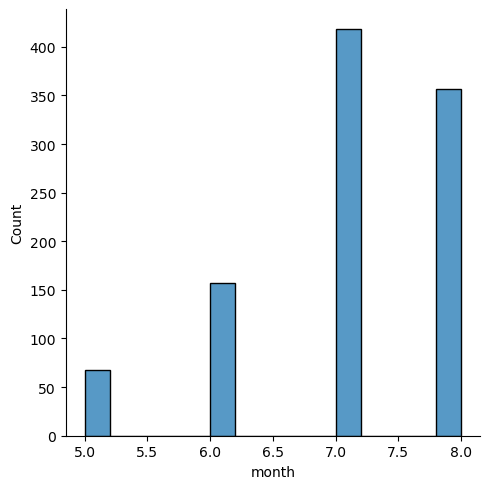

In [158]:
for col in data.select_dtypes("number"):
    sns.displot(data[col])
    plt.show()

All fetures in numerical columns are distict,we can't observe normal distribution 

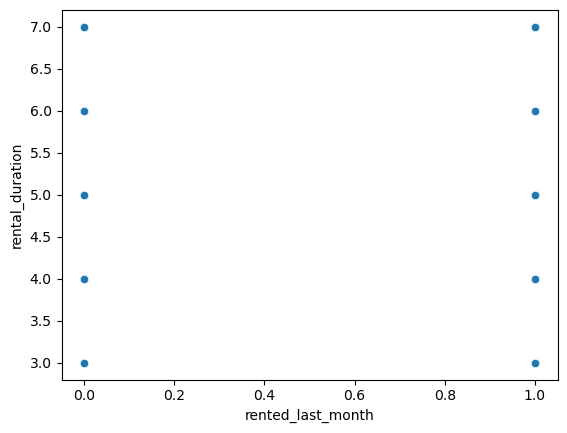

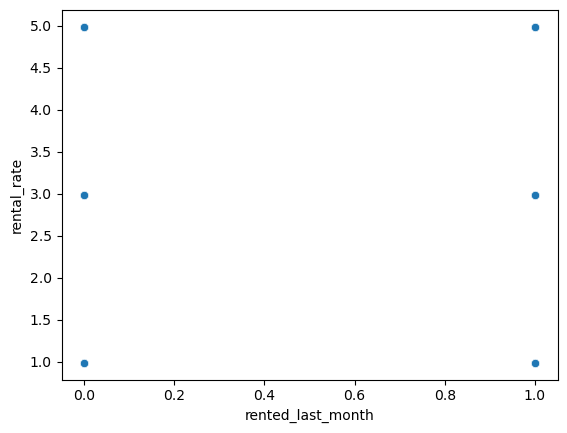

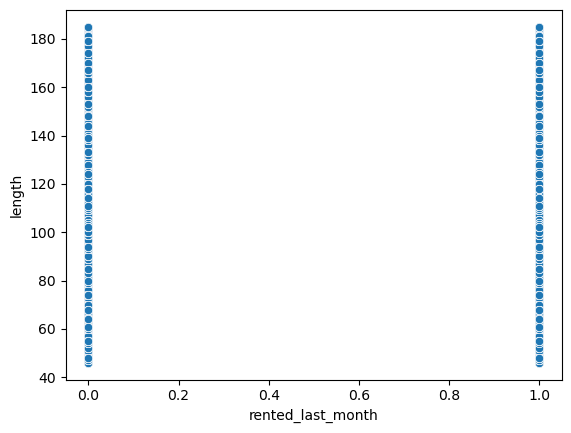

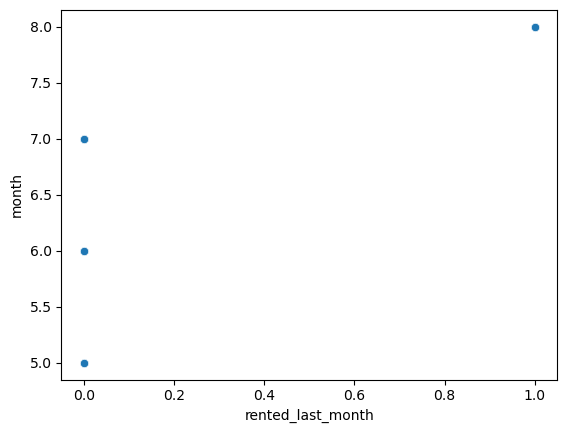

In [94]:
for col in data.select_dtypes("number"):
    sns.scatterplot(x=data['rented_last_month'], y=data[col])
    plt.show()

In [159]:

columns_to_drop = ['rental_date', 'rented_last_month']
X = data.drop(columns=columns_to_drop)
X

,title,rental_duration,rental_rate,length,rating,month
film_id,,,,,,
1,ACADEMY DINOSAUR,6,0.99,86,PG,7
1,ACADEMY DINOSAUR,6,0.99,86,PG,8
1,ACADEMY DINOSAUR,6,0.99,86,PG,8
1,ACADEMY DINOSAUR,6,0.99,86,PG,5
1,ACADEMY DINOSAUR,6,0.99,86,PG,6
...,...,...,...,...,...,...
66,BENEATH RUSH,6,0.99,53,NC-17,7
66,BENEATH RUSH,6,0.99,53,NC-17,8
66,BENEATH RUSH,6,0.99,53,NC-17,7


In [160]:
X = pd.get_dummies(X, columns=['title', 'rating'])
X

,rental_duration,rental_rate,length,month,title_ACADEMY DINOSAUR,title_ACE GOLDFINGER,title_ADAPTATION HOLES,title_AFFAIR PREJUDICE,title_AFRICAN EGG,title_AGENT TRUMAN,...,title_BED HIGHBALL,title_BEDAZZLED MARRIED,title_BEETHOVEN EXORCIST,title_BEHAVIOR RUNAWAY,title_BENEATH RUSH,rating_G,rating_NC-17,rating_PG,rating_PG-13,rating_R
film_id,,,,,,,,,,,,,,,,,,,,,
1,6,0.99,86,7,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,6,0.99,86,8,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,6,0.99,86,8,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,6,0.99,86,5,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,6,0.99,86,6,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,6,0.99,53,7,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
66,6,0.99,53,8,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
66,6,0.99,53,7,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False


In [161]:

y=data['rented_last_month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       129
        True       1.00      1.00      1.00        71

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [168]:
from scipy import stats

# boxcox is similar to log, tend to make data a bit more normally distributed and smooths outliers

def boxcox_transform(data):
    numeric_cols = data.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # to avoid -inf in df, we don't use negative or values = 0
        data[column] = np.where(data[column]<=0, np.NAN, data[column])
        data[column] = data[column].fillna(data[column].mean())
        transformed_data, ci = stats.boxcox(data[column])
        data[column] = transformed_data
        _ci[column] = [ci]
    return data, _ci

data, _ci = boxcox_transform(data)
data

,title,rental_duration,rental_rate,length,rating,rental_date,month,rented_last_month
film_id,,,,,,,,
1,ACADEMY DINOSAUR,11.667387,0.442183,11.981797,PG,2005-07-08 19:03:15,251.786681,False
1,ACADEMY DINOSAUR,11.667387,0.442183,11.981797,PG,2005-08-02 20:13:10,401.760969,True
1,ACADEMY DINOSAUR,11.667387,0.442183,11.981797,PG,2005-08-21 21:27:43,401.760969,True
1,ACADEMY DINOSAUR,11.667387,0.442183,11.981797,PG,2005-05-30 20:21:07,77.050799,False
1,ACADEMY DINOSAUR,11.667387,0.442183,11.981797,PG,2005-06-17 20:24:00,146.599479,False
...,...,...,...,...,...,...,...,...
66,BENEATH RUSH,11.667387,0.442183,9.171949,NC-17,2005-07-07 04:04:26,251.786681,False
66,BENEATH RUSH,11.667387,0.442183,9.171949,NC-17,2005-08-02 04:45:01,401.760969,True
66,BENEATH RUSH,11.667387,0.442183,9.171949,NC-17,2005-07-08 19:02:46,251.786681,False


In [169]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       129
        True       1.00      1.00      1.00        71

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [170]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train_scaled, y_train)

predictions = classification.predict(X_test_scaled)
print(classification_report(y_test, predictions))

# compared to normalizer it improved in some, but not all

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       129
        True       1.00      1.00      1.00        71

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [171]:
# Random
# duplicate rows of minority classes
from imblearn.over_sampling import RandomOverSampler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train_scaled, y_train)

y_train.value_counts()

rented_last_month
False    514
True     514
Name: count, dtype: int64

In [172]:
# Quick Test RandomOverSampler

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test_scaled)
print(classification_report(y_test, predictions))

# here, D got better, C got worse

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       129
        True       1.00      1.00      1.00        71

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



The result   may indicate a perfect classification performance. However, it's essential to consider the context and potential issues with such high scores:overfitting, data Leakage,imbalanced data,perfect separation.